## Step 1: Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Step 2 : Loading dataset

In [2]:
import os
working_directory = os.getcwd()
path  = working_directory + '/weatherAUS.csv'
df = pd.read_csv(path)



In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(145460, 24)

## Step 3 : Data Cleaning

In [5]:
df.groupby("Location")["Location"].agg("count")

Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville      

In [6]:
df.groupby("Date")["Date"].agg("count")

Date
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
              ..
2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    49
2017-06-25    48
Name: Date, Length: 3436, dtype: int64

## Step 4 : Dropping the other variables

#### Since we are developing a model to predict the Tomorrow's rain based on average relative humdity and pressure aspects we drop the other variables. 

In [7]:
df1=df.drop(["Date" , "Location","MinTemp", "MaxTemp" , "Rainfall" , "Evaporation" , "Sunshine" , "WindGustDir" ,"WindGustSpeed" ,"WindDir3pm" , "WindSpeed9am" , "WindSpeed3pm"  ,"WindDir9am" ,"Cloud9am" , "Cloud3pm"  , "Temp9am" , "Temp3pm" , "RISK_MM" ],axis="columns")
df1.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,71.0,22.0,1007.7,1007.1,No,No
1,44.0,25.0,1010.6,1007.8,No,No
2,38.0,30.0,1007.6,1008.7,No,No
3,45.0,16.0,1017.6,1012.8,No,No
4,82.0,33.0,1010.8,1006.0,No,No


In [8]:
df1.shape

(145460, 6)

In [9]:
df1.isnull().sum()

Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
df1.dtypes[df1.dtypes!= "object"]

Humidity9am    float64
Humidity3pm    float64
Pressure9am    float64
Pressure3pm    float64
dtype: object

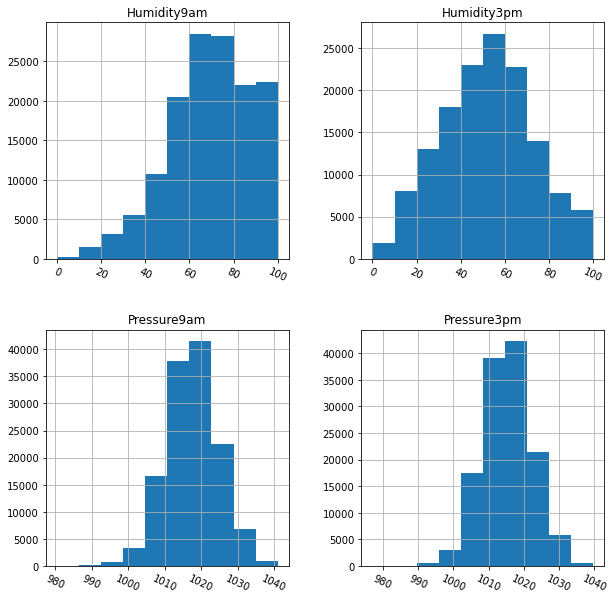

In [11]:
df1.hist(figsize=(10,10), xrot=-25)
plt.ticklabel_format(style='plain')


## Step 4: Dropping Null values 

### As the null value count is significatnly lower than compared to the overall available values we decide to ince the null values are scares we drop the same


In [12]:
df2 = df1.dropna()
df2.shape

(124412, 6)

In [13]:
df2.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,71.0,22.0,1007.7,1007.1,No,No
1,44.0,25.0,1010.6,1007.8,No,No
2,38.0,30.0,1007.6,1008.7,No,No
3,45.0,16.0,1017.6,1012.8,No,No
4,82.0,33.0,1010.8,1006.0,No,No


In [14]:
df2.isnull().sum()

Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
dtype: int64

## Step 5 : Taking averages of Humidity and Pressures respectively for a given day 


In [15]:
df2["Humidity"] = ((df2["Humidity9am"]+ df2["Humidity3pm"])/2)
df2.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,Humidity
0,71.0,22.0,1007.7,1007.1,No,No,46.5
1,44.0,25.0,1010.6,1007.8,No,No,34.5
2,38.0,30.0,1007.6,1008.7,No,No,34.0
3,45.0,16.0,1017.6,1012.8,No,No,30.5
4,82.0,33.0,1010.8,1006.0,No,No,57.5


In [16]:
df2["Pressure"] = ((df2["Pressure9am"]+ df2["Pressure9am"])/2)
df2.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,Humidity,Pressure
0,71.0,22.0,1007.7,1007.1,No,No,46.5,1007.7
1,44.0,25.0,1010.6,1007.8,No,No,34.5,1010.6
2,38.0,30.0,1007.6,1008.7,No,No,34.0,1007.6
3,45.0,16.0,1017.6,1012.8,No,No,30.5,1017.6
4,82.0,33.0,1010.8,1006.0,No,No,57.5,1010.8


In [17]:
df2.isnull().sum()

Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
Humidity        0
Pressure        0
dtype: int64

In [18]:
df2.shape

(124412, 8)

## Step 6 : Droppping the Other Humidity, Pressure and Rain today values 

#### As we got the average humidity and presuure recorded thorughout the day we drop the seperate humdity, pressureand rain today value is also removed ans we are predicting the rain for Tomorrow only

In [19]:
df3=df2.drop(["Humidity9am" , "Humidity3pm","Pressure9am", "Pressure3pm" , "RainToday" ],axis="columns")
df3.head()

,RainTomorrow,Humidity,Pressure
0,No,46.5,1007.7
1,No,34.5,1010.6
2,No,34.0,1007.6
3,No,30.5,1017.6
4,No,57.5,1010.8


## Step 7 : Rearranging the target value to the end for better visualisation 

### Moving Rain toomorrow value to the end of the dataset

In [20]:
cols = df3.columns.tolist()
cols

['RainTomorrow', 'Humidity', 'Pressure']

In [21]:
cols = cols[-1:] + cols[:-1]
cols

['Pressure', 'RainTomorrow', 'Humidity']

In [22]:
cols = cols[-1:] + cols[:-1]
cols

['Humidity', 'Pressure', 'RainTomorrow']

In [23]:
df4 = df3[cols]

df4.head()

,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,No
1,34.5,1010.6,No
2,34.0,1007.6,No
3,30.5,1017.6,No
4,57.5,1010.8,No


## Step 8 : Creating dummies for the Yes and No Variable to convert the dataset into a numeical data set


In [24]:
df4['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

df4.head()



,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,0
1,34.5,1010.6,0
2,34.0,1007.6,0
3,30.5,1017.6,0
4,57.5,1010.8,0


In [25]:
df5 = df4.copy()

df5.head()


,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,0
1,34.5,1010.6,0
2,34.0,1007.6,0
3,30.5,1017.6,0
4,57.5,1010.8,0


In [26]:
df5.describe()

,Humidity,Pressure,RainTomorrow
count,124412.000000,124412.000000,124412.000000
mean,59.807928,1017.671831,0.221136
std,18.135677,7.105134,0.415014
min,0.000000,980.500000,0.000000
25%,48.500000,1013.000000,0.000000
50%,61.000000,1017.700000,0.000000
75%,73.000000,1022.400000,0.000000
max,100.000000,1041.000000,1.000000


In [27]:

df5.to_csv('Rain_prediction4.csv', index=False)



In [28]:
import os
working_directory = os.getcwd()
path  = working_directory + '/Rain_Prediction4.csv'
df = pd.read_csv(path)

df.head()

,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,0
1,34.5,1010.6,0
2,34.0,1007.6,0
3,30.5,1017.6,0
4,57.5,1010.8,0


## Step 9 : Normalising the data 

In [29]:
df.Humidity = (df.Humidity - min(df.Humidity)) / (max(df.Humidity) - min(df.Humidity));
df.Humidity

0         0.465
1         0.345
2         0.340
3         0.305
4         0.575
          ...  
124407    0.430
124408    0.375
124409    0.385
124410    0.385
124411    0.375
Name: Humidity, Length: 124412, dtype: float64

In [30]:
df.Pressure = (df.Pressure - min(df.Pressure)) / (max(df.Pressure) - min(df.Pressure));
df.Pressure

0         0.449587
1         0.497521
2         0.447934
3         0.613223
4         0.500826
            ...   
124407    0.730579
124408    0.728926
124409    0.710744
124410    0.669421
124411    0.642975
Name: Pressure, Length: 124412, dtype: float64

In [31]:
df.head()

,Humidity,Pressure,RainTomorrow
0,0.465,0.449587,0
1,0.345,0.497521,0
2,0.340,0.447934,0
3,0.305,0.613223,0
4,0.575,0.500826,0


## Step 10 : Inital steps for training set and test set split

In [32]:
X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

In [33]:
X

,Humidity,Pressure
0,0.465,0.449587
1,0.345,0.497521
2,0.340,0.447934
3,0.305,0.613223
4,0.575,0.500826
...,...,...
124407,0.430,0.730579
124408,0.375,0.728926
124409,0.385,0.710744
124410,0.385,0.669421


In [34]:
y

0         0
1         0
2         0
3         0
4         0
         ..
124407    0
124408    0
124409    0
124410    0
124411    0
Name: RainTomorrow, Length: 124412, dtype: int64

## Step 11 : Spliting the set into training and test set based on train_test_split

In [35]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from dateutil.parser import parse
from sklearn.metrics import accuracy_score as acc

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [37]:
x_train

,Humidity,Pressure
105419,0.820,0.636364
36903,0.355,0.462810
79620,0.985,0.695868
42004,0.560,0.705785
63211,0.700,0.489256
...,...,...
7732,0.330,0.391736
81714,0.510,0.598347
62964,0.595,0.545455
110462,0.400,0.687603


In [38]:
y_train

105419    1
36903     0
79620     1
42004     0
63211     0
         ..
7732      0
81714     0
62964     0
110462    0
109982    1
Name: RainTomorrow, Length: 93309, dtype: int64

In [39]:
x_test

,Humidity,Pressure
42282,0.560,0.538843
70240,0.765,0.732231
78891,0.715,0.563636
12812,0.370,0.490909
61501,0.620,0.676033
...,...,...
37205,0.505,0.631405
113024,0.760,0.571901
103248,0.265,0.679339
96601,0.650,0.652893


In [40]:
y_test

42282     1
70240     0
78891     0
12812     0
61501     0
         ..
37205     0
113024    0
103248    0
96601     0
114708    0
Name: RainTomorrow, Length: 31103, dtype: int64

## Step 12 : Model Building 
## Model 1 : Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model_lr = LogisticRegression()

In [43]:
model_lr.fit(x_train, y_train)

LogisticRegression()

In [44]:
lr_prediction = model_lr.predict(x_test)

### Step 12.1:  Model Accuracy 

In [45]:
acc(y_test,lr_prediction)

0.8282159277240138

### Step 12.2 Confusion matrix 

In [46]:
y_pred=model_lr.predict(x_test)

In [47]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23046,  1203],
       [ 4140,  2714]], dtype=int64)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

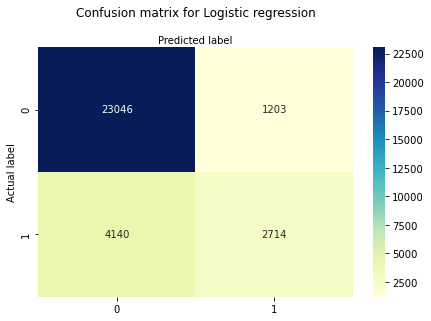

In [49]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Step 12.3 : Mean Absolute error 

In [50]:
from sklearn.metrics import mean_absolute_error
#

mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

17.178407227598626


### Step 12.4: Accuracy, {recision, Recall and F1 Score

In [51]:
import numpy as np
from sklearn.metrics import f1_score

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score: " , f1_score(y_test, y_pred))

Accuracy: 0.8282159277240138
Precision: 0.6928772019402604
Recall: 0.3959731543624161
F1 Score:  0.5039457803360876


## Step 13 : Model Building
## Model 2 : Random Forest

In [53]:
model = RandomForestClassifier(n_jobs = -1)

In [54]:
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [55]:
prediction = model.predict(x_test)

### Step 13.1: Model Accuracy

In [56]:
acc(prediction, y_test)

0.7925602031958332

### Step 13.2 Confusion matrix

In [57]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[21802,  2447],
       [ 4005,  2849]], dtype=int64)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

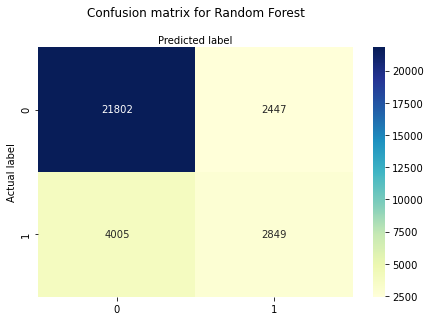

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Step 13.3 : Mean Absolute error

In [60]:
from sklearn.metrics import mean_absolute_error
#

mape = mean_absolute_error(y_test, prediction)*100
print(mape)

20.74397968041668


### Step 13.4: Accuracy, recision, Recall and F1 Score

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("F1 Score: " , f1_score(y_test, prediction))

Accuracy: 0.7925602031958332
Precision: 0.537953172205438
Recall: 0.4156696819375547
F1 Score:  0.46897119341563787


## Step 14 : Test set ROC curve 

In [62]:
# predict probabilities
pred_prob1 = model_lr.predict_proba(x_test)

pred_prob2 = model.predict_proba(x_test)


In [63]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [64]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



In [65]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

In [66]:
print(auc_score1, auc_score2)

0.821630336739645 0.7485352760268329


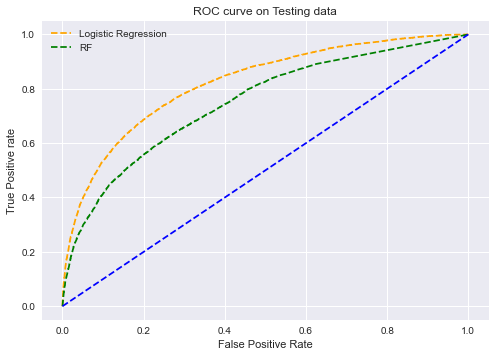

In [67]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve on Testing data')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Step 15 : Training set ROC curve

In [68]:
pred_prob1 = model_lr.predict_proba(x_train)

pred_prob2 = model.predict_proba(x_train)

In [69]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_train, pred_prob1[:,1], pos_label=1)


fpr2, tpr2, thresh2 = roc_curve(y_train, pred_prob2[:,1], pos_label=1)

In [70]:
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)


In [71]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_train, pred_prob1[:,1])


auc_score2 = roc_auc_score(y_train, pred_prob2[:,1])

In [72]:
print(auc_score1, auc_score2)

0.8199328082200542 0.9389198466087261


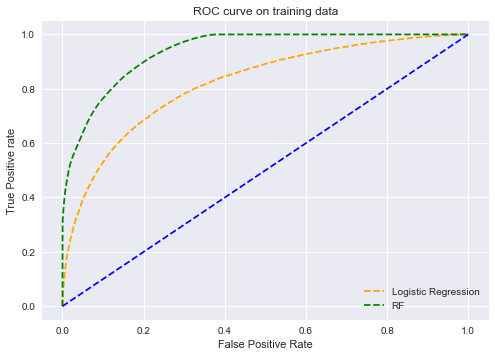

In [73]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve on training data')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();